In [1]:
import kagglehub
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download latest version of fashion mnist dataset
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/applr/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [2]:
train_df = pd.read_csv(path+ '/fashion-mnist_train.csv', index_col=False)
test_df = pd.read_csv(path+ '/fashion-mnist_test.csv', index_col=False)

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_X = train_df.drop('label', axis=1) / 255.0
train_y = train_df['label'].values

test_X = test_df.drop('label', axis=1) / 255.0
test_y = test_df['label'].values

# reshape the data features to 28x28x
train_X = train_X.values.reshape(-1, 28, 28, 1)
test_X = test_X.values.reshape(-1, 28, 28, 1)

In [6]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


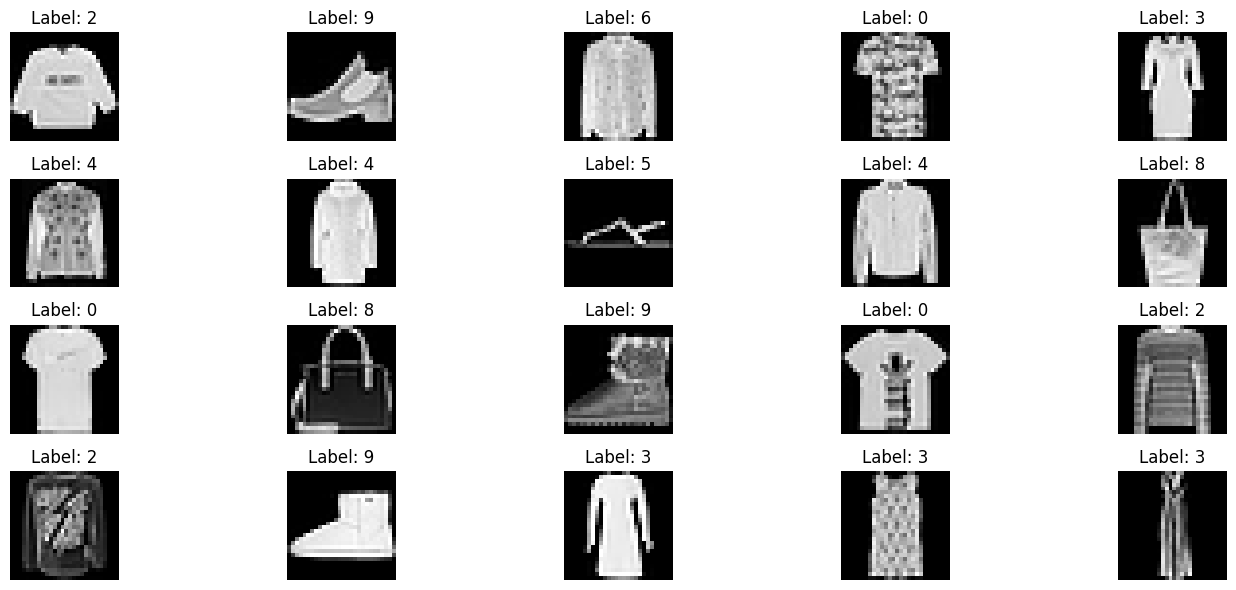

In [7]:
fig, axes = plt.subplots(4, 5, figsize=(15, 6))

for i in range (20):
    ax = axes[i // 5, i % 5]
    ax.imshow(train_X[i], cmap='gray')
    ax.set_title(f"Label: {train_y[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

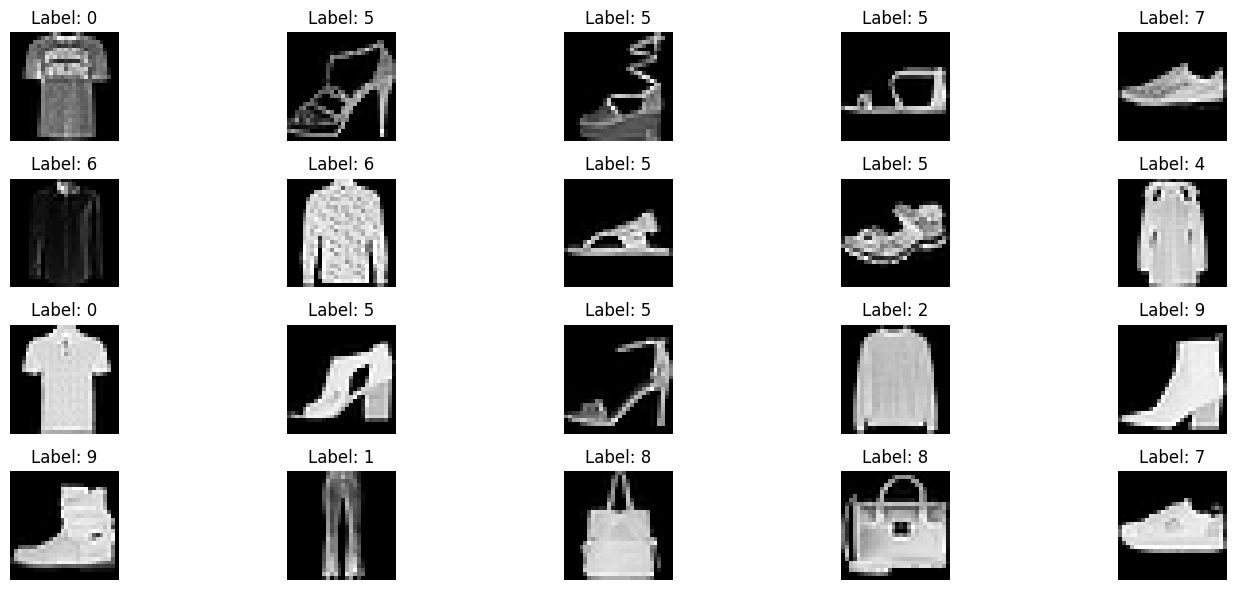

In [8]:
# Display the last 20 images
num_images = 20
start_index = train_X.shape[0] - num_images

fig, axes = plt.subplots(4, 5, figsize=(15, 6))

for i in range(num_images):
    ax = axes[i // 5, i % 5]
    ax.imshow(train_X[start_index + i], cmap='gray')
    ax.set_title(f"Label: {train_y[start_index + i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
    

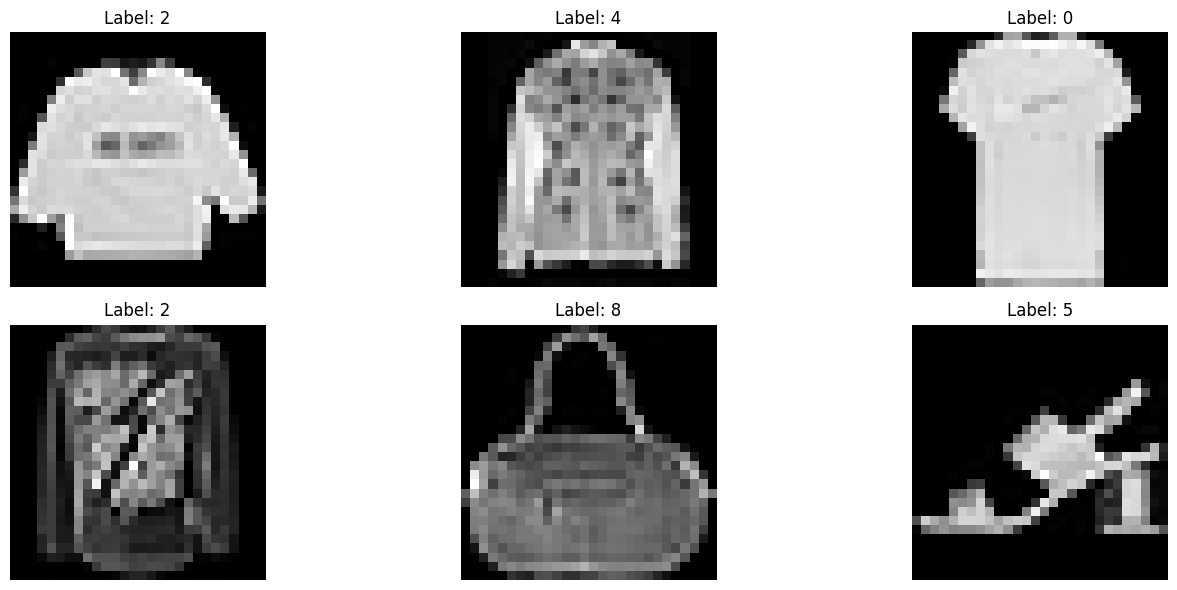

In [9]:
specific_index = [0, 5, 10, 15, 20, 50]

fig, axes = plt.subplots(2, 3, figsize=(15, 6))

for i, idx in enumerate(specific_index):
    ax = axes[i // (len(specific_index) // 2), i % (len(specific_index) // 2)]
    ax.imshow(train_X[idx], cmap='gray')
    ax.set_title(f"Label: {train_y[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [10]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-10-30 14:40:40.457190: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 30,   
    zoom_range = 0.2,
    horizontal_flip = True,
)

In [12]:
augmented_images = []
augmented_labels = []

for X, y in zip(train_X, train_y):
    for _ in range(5):
        augmented_image = datagen.random_transform(X)
        augmented_images.append(augmented_image)
        augmented_labels.append(y)
    

In [13]:
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

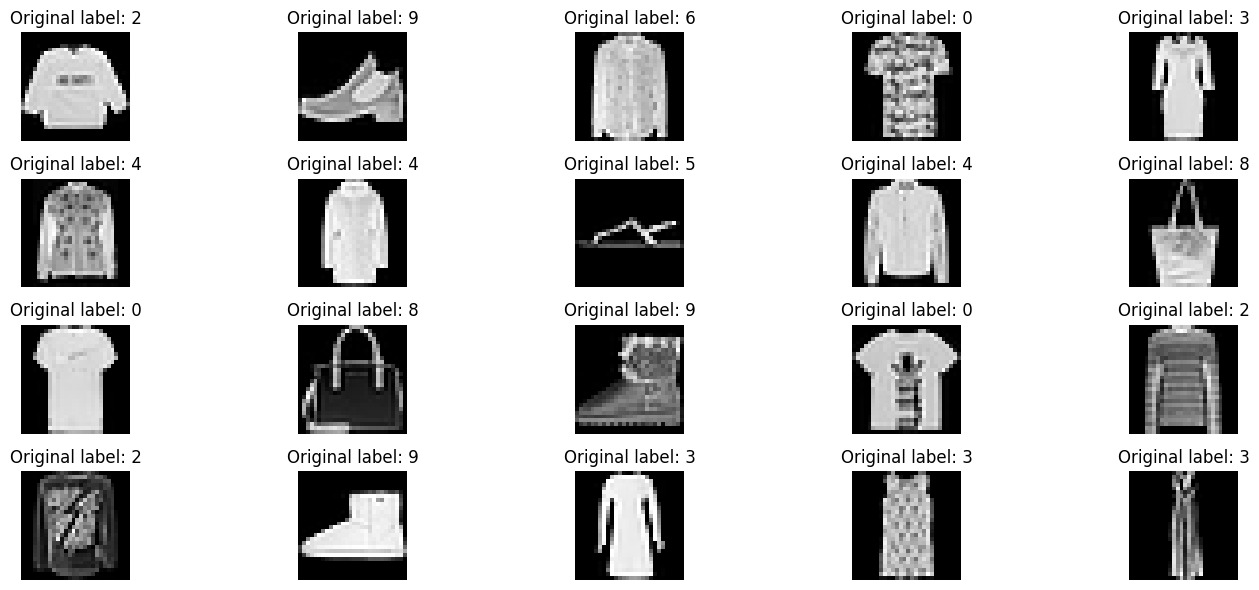

In [14]:
fig, axes = plt.subplots(4, 5, figsize=(15, 6))
for i in range(20):
    ax = axes[i // 5, i % 5]
    ax.imshow(train_X[i], cmap='gray')
    ax.set_title(f"Original label: {train_y[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

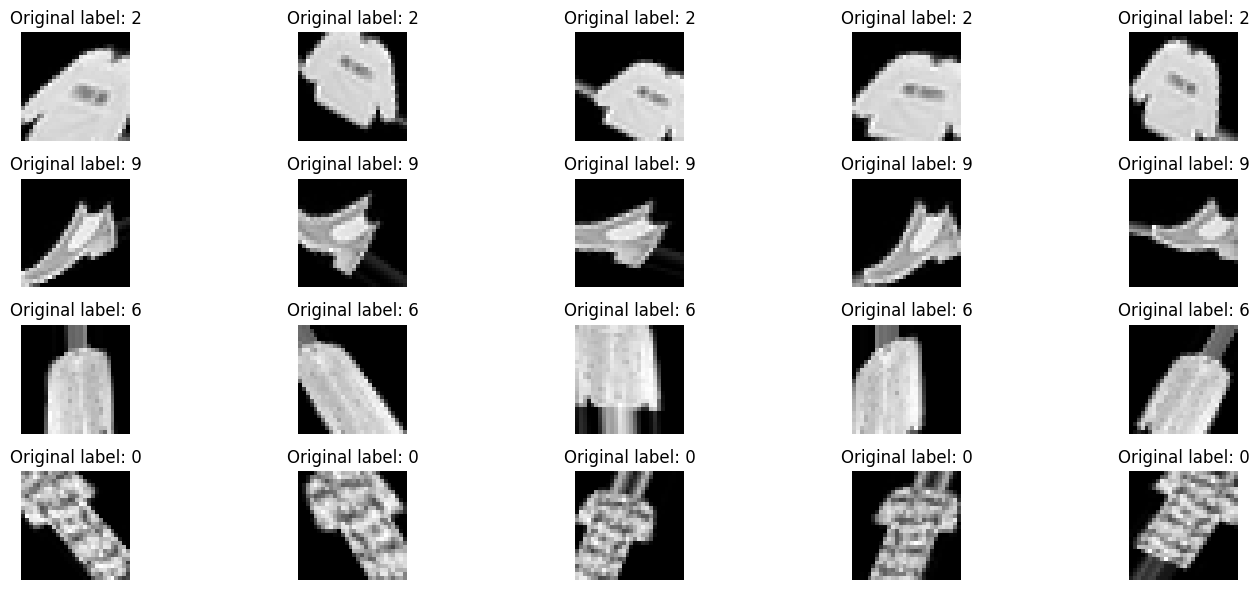

In [15]:
fig, axes = plt.subplots(4, 5, figsize=(15, 6))
for i in range(20):
    ax = axes[i // 5, i % 5]
    ax.imshow(augmented_images[i], cmap='gray')
    ax.set_title(f"Original label: {augmented_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()